In [36]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import xgboost as xgb

# For Clustering Analysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [37]:
# Encode Country and Item using OneHotEncoder

merged_data = pd.read_csv('/content/Final_merged_data.csv')

# Country and Year is not needed
merged_data = merged_data.drop(['Country', 'Year'], axis=1)

merged_data_onehot = pd.get_dummies(merged_data, columns = ['Item'], prefix = ['Item'])
merged_data = merged_data_onehot.loc[:, merged_data_onehot.columns != 'Yield (hg/ha)']
merged_data ['Yield (hg/ha)'] = merged_data_onehot['Yield (hg/ha)']
merged_data

,Rainfall (mm),Temperature (Celcius),Pesticides (Tons),"Item_Abaca, manila hemp, raw",Item_Areca nuts,Item_Avocados,Item_Bananas,"Item_Beans, dry",Item_Cabbages,Item_Cantaloupes and other melons,...,Item_Soya beans,Item_Spinach,Item_Sugar cane,Item_Sweet potatoes,Item_Tea leaves,Item_Tomatoes,Item_Unmanufactured tobacco,"Item_Vanilla, raw",Item_Watermelons,Yield (hg/ha)
0,190.783333,26.6,313639.25,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8275
1,190.783333,26.6,313639.25,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12623
2,190.783333,26.6,313639.25,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,109367
3,190.783333,26.6,313639.25,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,568256
4,190.783333,26.6,313639.25,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,11300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,199.550000,26.8,283297.13,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,50244
716,199.550000,26.8,283297.13,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,187605
717,199.550000,26.8,283297.13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,11544
718,199.550000,26.8,283297.13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1528


In [38]:
merged_data.shape

(720, 64)

In [39]:
# Scaling Features

y = merged_data['Yield (hg/ha)']
x = merged_data.drop(['Yield (hg/ha)'], axis=1)

scaler = MinMaxScaler()
data_no_yield = pd.DataFrame(scaler.fit_transform(x), index = y.index)
data_no_yield.columns = x.columns
data_no_yield.insert(len(data_no_yield.columns), 'Yield (hg/ha)', y)

merged_data = data_no_yield
merged_data

,Rainfall (mm),Temperature (Celcius),Pesticides (Tons),"Item_Abaca, manila hemp, raw",Item_Areca nuts,Item_Avocados,Item_Bananas,"Item_Beans, dry",Item_Cabbages,Item_Cantaloupes and other melons,...,Item_Soya beans,Item_Spinach,Item_Sugar cane,Item_Sweet potatoes,Item_Tea leaves,Item_Tomatoes,Item_Unmanufactured tobacco,"Item_Vanilla, raw",Item_Watermelons,Yield (hg/ha)
0,0.669914,0.166667,0.748439,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8275
1,0.669914,0.166667,0.748439,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12623
2,0.669914,0.166667,0.748439,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109367
3,0.669914,0.166667,0.748439,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,568256
4,0.669914,0.166667,0.748439,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.733971,0.500000,0.537343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50244
716,0.733971,0.500000,0.537343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,187605
717,0.733971,0.500000,0.537343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11544
718,0.733971,0.500000,0.537343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1528


In [40]:
# splitting the data into training and testing (80/20)

# excluding Yield (hg/ha) values as it is what the ML model should be predicting
y = merged_data['Yield (hg/ha)']
x = merged_data.drop(['Yield (hg/ha)'], axis=1)

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("The shape of x train:", x_train.shape)
print("The shape of x test:", x_test.shape)
print("The shape of y train:", y_train.shape)
print("The shape of y test:", y_test.shape)

The shape of x train: (576, 63)
The shape of x test: (144, 63)
The shape of y train: (576,)
The shape of y test: (144,)


In [41]:
# Search for the optimal hyperparamaters for XGBoost using GridSearch

from sklearn.model_selection import GridSearchCV

xgb_reg = xgb.XGBRegressor()

param_grid = {"max_depth":    [3, 5, 7, 10],
              "n_estimators": [50, 100, 150, 200],
              "learning_rate": [0.01, 0.1, 0.2, 0.3]}

search = GridSearchCV(xgb_reg, param_grid, cv=5).fit(x_train, y_train)

print("The best hyperparameters are ", search.best_params_)

The best hyperparameters are  {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 150}


In [42]:
# train the XGBoost model

start_train_time = time.time()
xgb_reg = xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"])
xgb_reg.fit(x_train, y_train)
end_train_time = time.time()

# make predictions

start_pred_time = time.time()
y_pred = xgb_reg.predict(x_test)
end_pred_time = time.time()

# find time taken

time_train_taken = end_train_time - start_train_time
time_pred_taken = end_pred_time - start_pred_time

In [43]:
# evaluation metrics

r2 = r2_score(y_test, y_pred) # R^2
mae = mean_absolute_error(y_test, y_pred) # mean absolute error
mse = mean_squared_error(y_test, y_pred) # mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False) # root mean squared error
max_err = max_error(y_test, y_pred) # max error
mape = mean_absolute_percentage_error(y_test, y_pred) # mean absolute percentage error

metrics_legend = f'R^2 = {r2}\n MAE = {mae}\n MSE = {mse}\n RMSE = {rmse}\n MAX = {max_err}\n MAPE = {mape}'

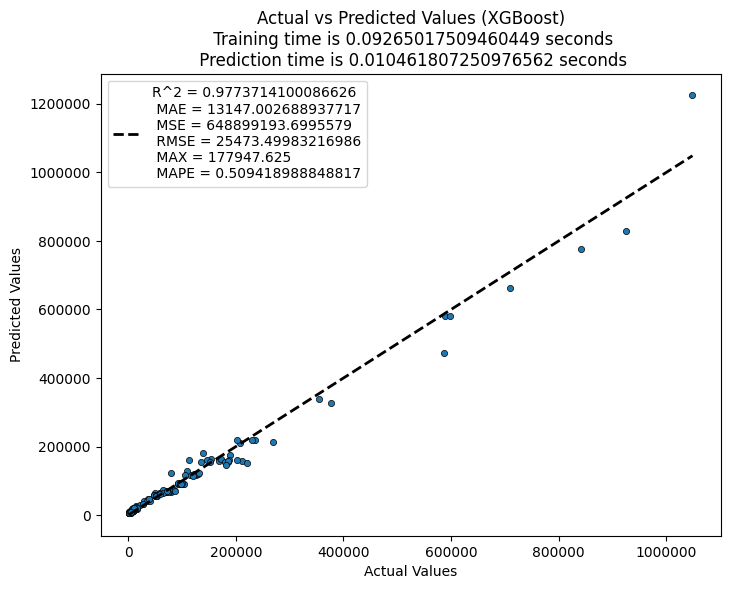

In [44]:
# plot the actual vs predicted values

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, s = 20, edgecolors = 'black', linewidth = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2, label = metrics_legend)

plt.title('Actual vs Predicted Values (XGBoost)\n Training time is ' + str(time_train_taken) + ' seconds\n Prediction time is ' + str(time_pred_taken) + ' seconds')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.ticklabel_format(style='plain', axis='both')
plt.legend()
plt.show()

Item_Pineapples: 0.3611023724079132
Item_Papayas: 0.17396169900894165
Item_Sugar cane: 0.11632232367992401
Item_Bananas: 0.08418137580156326
Item_Pumpkins, squash and gourds: 0.06486917287111282


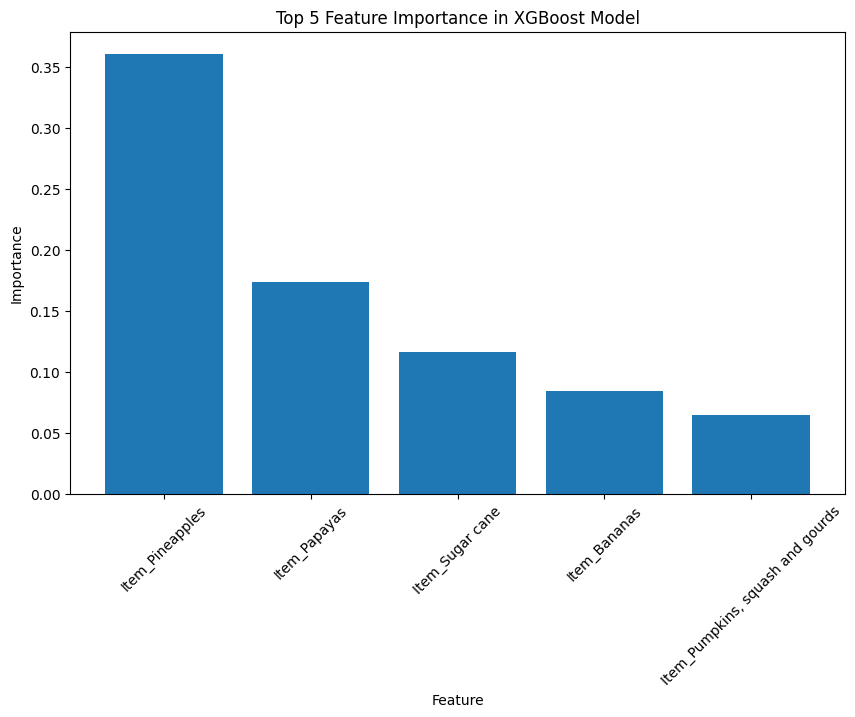

In [49]:
# Get feature importance
feature_importance = xgb_reg.feature_importances_

# Map feature importance to feature names
feature_names = x_train.columns
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort feature importance in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Select the top 5 features
top_features = sorted_feature_importance[:5]

# Print the first 5 features and their importance
for feature, importance in top_features:
    print(f"{feature}: {importance}")

# Plotting feature importance for the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_features)), [val[1] for val in top_features], align="center")
plt.xticks(range(len(top_features)), [val[0] for val in top_features], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 5 Feature Importance in XGBoost")
plt.show()